# Robust non-rigid point registration

Paper chart extractor - Hannah Valenty

https://en.wikipedia.org/wiki/Point-set_registration

### Point registration

A method in computer vision where a spacial transform is implemented to align two point clouds (grouping of points). One cloud grouping can be classified as the model M, which we want to move to minimize the difference between that and the static scene points S.

### Non-rigid registration

Non-rigid refers to the type of transformation being applied to the model points in matching to the scene. Examples of this include affine (scaling and shear) transformations, but more generally applies to a nonlinear transformation.

### Robust registration

Robustness improves registration from the least squares formulation as it better considers outliers. 

### Coherent point drift

This method takes a probabalistic approach to align the point sets. It is transformation model agnostic, where other approaches adopt the thin plate spline method.

----------------------

## CPD implementation from existing methods

https://github.com/siavashk/pycpd/tree/master

Install from PyPI

In [3]:
!pip install pycpd

### Example usage from README

In [10]:
from pycpd import RigidRegistration
import numpy as np
import matplotlib.pyplot as plt

# create 2D target points (you can get these from any source you desire)
# creating a square w/ 2 additional points.
target = np.array([[0, 0], [0, 1], [1, 0], [1, 1], [0.5, 0], [0, 0.5]])
print('Target Points: \n', target)

Target Points: 
 [[0.  0. ]
 [0.  1. ]
 [1.  0. ]
 [1.  1. ]
 [0.5 0. ]
 [0.  0.5]]


In [11]:
# create a translation to apply to the target for testing the registration
translation = [1, 0]

# create a fake source by adding a translation to the target.
# in a real use, you would load the source points from a file or other source.
# the only requirement is that this array also be 2-dimensional and that the
# second dimension be the same length as the second dimension of the target array.
source = target + translation
print('Source Points: \n', source)

Source Points: 
 [[1.  0. ]
 [1.  1. ]
 [2.  0. ]
 [2.  1. ]
 [1.5 0. ]
 [1.  0.5]]


In [12]:
# create a RigidRegistration object
reg = RigidRegistration(X=target, Y=source)
# run the registration & collect the results
TY, (s_reg, R_reg, t_reg) = reg.register()

# TY is the transformed source points
# the values in () are the registration parameters.
# In this case of rigid registration they are:
#     s_reg the scale of the registration
#     R_reg the rotation matrix of the registration
#     t_reg the translation of the registration

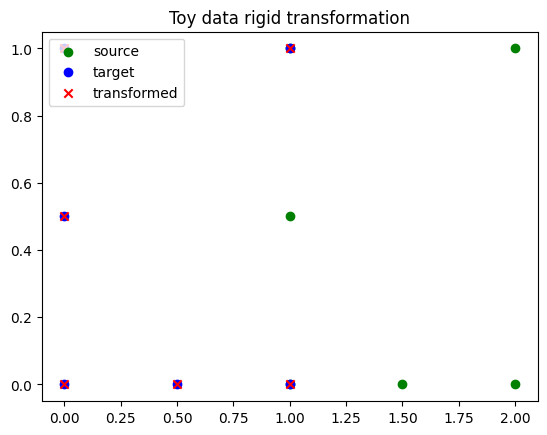

In [17]:
# plot for visual comparison
plt.scatter(source[:,0], source[:,1], c='g', marker='o', label='source')
plt.scatter(target[:,0], target[:,1], c='b', marker='o', label='target')
plt.scatter(TY[:,0], TY[:,1], c='r', marker='x', label='transformed')
plt.legend(loc='upper left')
plt.title('Toy data rigid transformation')
plt.show()

array([[0. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 1. ],
       [0.5, 0. ],
       [0. , 0.5]])